# Data Loading and First Exploratory Analysis

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer

In [202]:
df = pd.read_csv("../data/dataset_msca_&_safe.csv", sep=";")

C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\4257399334.py:1: DtypeWarning: Columns (12,256,357,360,361,449,604,811,1208,1357,1418) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/dataset_msca_&_safe.csv", sep=";")


In [203]:
df.drop(columns=["<<<<<<<",">>>>>>>"], inplace=True)

In [204]:
df.describe()

,attack,finalTick,hostInstRate,hostMemory,hostOpRate,hostSeconds,hostTickRate,simFreq,simInsts,simOps,...,system.membus.snoops,system.membus.transDist::CleanEvict,system.membus.transDist::InvalidateReq,system.membus.transDist::ReadExReq,system.membus.transDist::ReadExResp,system.membus.transDist::ReadResp,system.membus.transDist::ReadSharedReq,system.membus.transDist::WritebackDirty,system.workload.inst.arm,system.workload.inst.quiesce
count,23585.000000,2.358500e+04,23585.000000,23585.000000,23585.000000,23585.000000,2.358500e+04,2.358500e+04,2.358500e+04,2.358500e+04,...,23585.0,18366.000000,18177.000000,23585.000000,23585.000000,23585.000000,23585.000000,18364.000000,23585.0,23585.0
mean,0.789994,1.014813e+10,366333.670596,690395.450159,366336.097392,36.939202,4.093314e+08,1.000000e+12,3.571877e+06,3.571895e+06,...,0.0,149.972340,2.930737,166.670681,166.670045,3255.863812,3255.871868,19.675506,0.0,0.0
std,0.407321,1.690718e+11,172808.115474,20372.798661,172807.826293,580.209292,2.811811e+09,0.000000e+00,4.204957e+06,4.204959e+06,...,0.0,71.716341,1.772054,10.949556,10.953453,990.136200,990.126654,8.240937,0.0,0.0
min,0.000000,6.080000e+05,0.000000,661492.000000,0.000000,0.020000,2.033000e+03,1.000000e+12,6.000000e+01,6.000000e+01,...,0.0,1.000000,1.000000,5.000000,3.000000,9.000000,9.000000,1.000000,0.0,0.0
25%,1.000000,1.335469e+09,230948.000000,661496.000000,230950.000000,5.440000,1.828048e+08,1.000000e+12,1.751392e+06,1.751410e+06,...,0.0,105.000000,1.000000,162.000000,162.000000,3571.000000,3571.000000,13.000000,0.0,0.0
50%,1.000000,2.033499e+09,388446.000000,702856.000000,388448.000000,7.420000,2.566731e+08,1.000000e+12,2.715703e+06,2.715721e+06,...,0.0,120.000000,4.000000,166.000000,166.000000,3718.000000,3718.000000,23.000000,0.0,0.0
75%,1.000000,3.044698e+09,491947.000000,705896.000000,491950.000000,9.420000,3.749566e+08,1.000000e+12,4.065351e+06,4.065369e+06,...,0.0,207.000000,5.000000,171.000000,171.000000,3830.000000,3830.000000,26.000000,0.0,0.0
max,1.000000,7.399157e+12,818548.000000,707956.000000,818550.000000,19330.450000,1.037410e+11,1.000000e+12,4.129995e+07,4.129999e+07,...,0.0,572.000000,5.000000,186.000000,186.000000,4297.000000,4297.000000,57.000000,0.0,0.0


In [205]:
df.dtypes

attack                                       int64
finalTick                                  float64
hostInstRate                               float64
hostMemory                                 float64
hostOpRate                                 float64
                                            ...   
system.membus.transDist::ReadResp          float64
system.membus.transDist::ReadSharedReq     float64
system.membus.transDist::WritebackDirty    float64
system.workload.inst.arm                   float64
system.workload.inst.quiesce               float64
Length: 1534, dtype: object

In [206]:
df.columns

Index(['attack', 'finalTick', 'hostInstRate', 'hostMemory', 'hostOpRate',
       'hostSeconds', 'hostTickRate', 'simFreq', 'simInsts', 'simOps',
       ...
       'system.membus.snoops', 'system.membus.transDist::CleanEvict',
       'system.membus.transDist::InvalidateReq',
       'system.membus.transDist::ReadExReq',
       'system.membus.transDist::ReadExResp',
       'system.membus.transDist::ReadResp',
       'system.membus.transDist::ReadSharedReq',
       'system.membus.transDist::WritebackDirty', 'system.workload.inst.arm',
       'system.workload.inst.quiesce'],
      dtype='object', length=1534)

## Distributions

In [207]:
# df["attack"] = df["attack"].astype(bool)

<Axes: xlabel='attack', ylabel='count'>

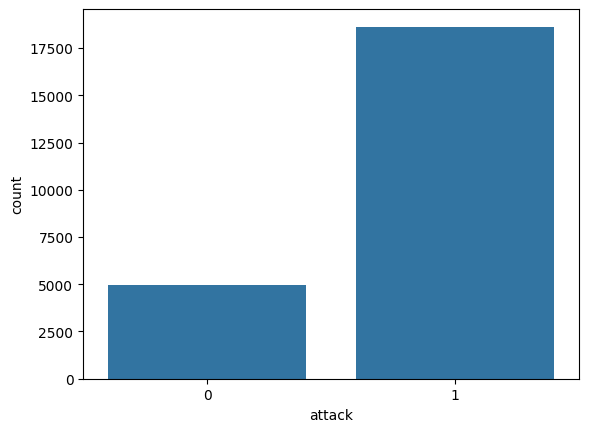

In [208]:
sns.countplot(x='attack', data=df)

Déséquilibre de classe assez marqué...

## Type Handling

In [209]:
column_types = df.dtypes
non_numerical_columns = column_types[(column_types != np.float64) & (column_types != np.int64)].index.tolist()

In [210]:
df[non_numerical_columns].columns

Index(['simSeconds', 'system.cpu.commit.numCommittedDist::mean',
       'system.cpu.commit.numCommittedDist::stdev', 'system.cpu.cpi',
       'system.cpu.dcache.LoadLockedReq.avgMissLatency::cpu.data',
       'system.cpu.dcache.LoadLockedReq.avgMissLatency::total',
       'system.cpu.dcache.ReadReq.avgMissLatency::cpu.data',
       'system.cpu.dcache.ReadReq.avgMissLatency::total',
       'system.cpu.dcache.ReadReq.avgMshrMissLatency::cpu.data',
       'system.cpu.dcache.ReadReq.avgMshrMissLatency::total',
       'system.cpu.dcache.WriteReq.avgMissLatency::cpu.data',
       'system.cpu.dcache.WriteReq.avgMissLatency::total',
       'system.cpu.dcache.WriteReq.avgMshrMissLatency::cpu.data',
       'system.cpu.dcache.WriteReq.avgMshrMissLatency::total',
       'system.cpu.dcache.avgBlocked::no_mshrs',
       'system.cpu.dcache.avgBlocked::no_targets',
       'system.cpu.dcache.demandAvgMissLatency::cpu.data',
       'system.cpu.dcache.demandAvgMissLatency::total',
       'system.cpu.dcac

In [211]:
df[non_numerical_columns].head()

,simSeconds,system.cpu.commit.numCommittedDist::mean,system.cpu.commit.numCommittedDist::stdev,system.cpu.cpi,system.cpu.dcache.LoadLockedReq.avgMissLatency::cpu.data,system.cpu.dcache.LoadLockedReq.avgMissLatency::total,system.cpu.dcache.ReadReq.avgMissLatency::cpu.data,system.cpu.dcache.ReadReq.avgMissLatency::total,system.cpu.dcache.ReadReq.avgMshrMissLatency::cpu.data,system.cpu.dcache.ReadReq.avgMshrMissLatency::total,...,system.mem_ctrl.avgWrBWSys,system.mem_ctrl.dram.avgRdBW,system.mem_ctrl.dram.bytesPerActivate::gmean,system.mem_ctrl.dram.bytesPerActivate::mean,system.mem_ctrl.dram.bytesPerActivate::stdev,system.mem_ctrl.priorityMaxLatency,system.mem_ctrl.priorityMinLatency,system.mem_ctrl.requestorReadRate::cpu.data,system.mem_ctrl.requestorReadRate::cpu.inst,system.mem_ctrl.requestorWriteRate::writebacks
0,0.008169,1.451.725,251.721,0.698427,125000.0,125000.0,27.031.864.009,27.031.864.009,2.473.795.246,2.473.795.246,...,26.636.530.826.888,32.504.402,222.155.018,412.322.981,411.335.005,6.26e-07,"1,88E-05",27.615.815.048.464.700,4.888.586.834.111.210,NaN
1,0.003101,1.373.426,2.473.166,0.743184,125000.0,125000.0,28.722.023.154,28.722.023.154,25.915.055.499,25.915.055.499,...,59.858.088.598.356,84.337.983,244.820.911,434.392.027,414.379.305,"5,89E-03","1,88E-05",7.185.034.703.823.400,12.487.635.724.829.500,NaN
2,0.003488,1.433.018,2.502.207,0.711219,125000.0,125000.0,28.517.008.249,28.517.008.249,25.782.316.591,25.782.316.591,...,55.051.411.423.569,75.218.578,238.754.259,427.257.329,413.416.019,"5,89E-03","1,88E-05",6.402.479.148.561.100,1.119.378.698.945.900,NaN
3,0.001831,1.319.141,2.441.977,0.781529,125000.0,125000.0,30.796.656.555,30.796.656.555,27.343.230.372,27.343.230.372,...,94.393.887.995.752,141.940.439,255.233.208,453.472.949,417.647.601,6.26e-07,"1,88E-05",12.124.370.502.565.500,2.069.673.396.055.010,NaN
4,0.005002,1.428.118,250.448,0.711574,125000.0,125000.0,27.681.902.013,27.681.902.013,25.196.808.934,25.196.808.934,...,3.966.309.558.866,52.598.383,232.804.118,42.029.393,412.451.531,"5,89E-03","1,88E-05",44.742.530.733.401.400,7.855.851.835.947.510,NaN


In [212]:
def clean_number(x):
    if isinstance(x, str):
        # retirer les séparateurs de milliers (.)
        x = x.replace('.', '')
        # remplacer virgule décimale par point
        x = x.replace(',', '.')
    try:
        return float(x)
    except:
        return np.na

Ces colonnes utilisent les points comme séparateurs des milliers. Il va falloir les nettoyer

In [213]:
df[non_numerical_columns] = df[non_numerical_columns].applymap(clean_number)

C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\480082095.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[non_numerical_columns] = df[non_numerical_columns].applymap(clean_number)


In [214]:
df[non_numerical_columns].astype(np.float64)

,simSeconds,system.cpu.commit.numCommittedDist::mean,system.cpu.commit.numCommittedDist::stdev,system.cpu.cpi,system.cpu.dcache.LoadLockedReq.avgMissLatency::cpu.data,system.cpu.dcache.LoadLockedReq.avgMissLatency::total,system.cpu.dcache.ReadReq.avgMissLatency::cpu.data,system.cpu.dcache.ReadReq.avgMissLatency::total,system.cpu.dcache.ReadReq.avgMshrMissLatency::cpu.data,system.cpu.dcache.ReadReq.avgMshrMissLatency::total,...,system.mem_ctrl.avgWrBWSys,system.mem_ctrl.dram.avgRdBW,system.mem_ctrl.dram.bytesPerActivate::gmean,system.mem_ctrl.dram.bytesPerActivate::mean,system.mem_ctrl.dram.bytesPerActivate::stdev,system.mem_ctrl.priorityMaxLatency,system.mem_ctrl.priorityMinLatency,system.mem_ctrl.requestorReadRate::cpu.data,system.mem_ctrl.requestorReadRate::cpu.inst,system.mem_ctrl.requestorWriteRate::writebacks
0,0.008169,1451725.0,251721.0,698427.000000,125000.0,125000.0,2.703186e+10,2.703186e+10,2.473795e+09,2.473795e+09,...,2.663653e+13,32504402.0,222155018.0,412322981.0,411335005.0,0.000063,0.000019,2.761582e+16,4.888587e+15,NaN
1,0.003101,1373426.0,2473166.0,743184.000000,125000.0,125000.0,2.872202e+10,2.872202e+10,2.591506e+10,2.591506e+10,...,5.985809e+13,84337983.0,244820911.0,434392027.0,414379305.0,0.005890,0.000019,7.185035e+15,1.248764e+16,NaN
2,0.003488,1433018.0,2502207.0,711219.000000,125000.0,125000.0,2.851701e+10,2.851701e+10,2.578232e+10,2.578232e+10,...,5.505141e+13,75218578.0,238754259.0,427257329.0,413416019.0,0.005890,0.000019,6.402479e+15,1.119379e+15,NaN
3,0.001831,1319141.0,2441977.0,781529.000000,125000.0,125000.0,3.079666e+10,3.079666e+10,2.734323e+10,2.734323e+10,...,9.439389e+13,141940439.0,255233208.0,453472949.0,417647601.0,0.000063,0.000019,1.212437e+16,2.069673e+15,NaN
4,0.005002,1428118.0,250448.0,711574.000000,125000.0,125000.0,2.768190e+10,2.768190e+10,2.519681e+10,2.519681e+10,...,3.966310e+12,52598383.0,232804118.0,42029393.0,412451531.0,0.005890,0.000019,4.474253e+16,7.855852e+15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23580,1017.000000,2221642.0,2281196.0,0.474526,28000.0,28000.0,9.311771e+09,9.311771e+09,9.654100e+05,9.654100e+05,...,0.000000e+00,104557894.0,277687844.0,441360996.0,372824186.0,0.000571,0.000019,7.046019e+15,3.409770e+16,NaN
23581,1171.000000,2243102.0,2289919.0,0.467612,28000.0,28000.0,9.298445e+10,9.298445e+10,9.610835e+10,9.610835e+10,...,0.000000e+00,90859547.0,277687844.0,441360996.0,372824186.0,0.000571,0.000019,6.122906e+16,2.963049e+16,NaN
23582,1275.000000,2265468.0,2283145.0,0.461660,28000.0,28000.0,9.289590e+10,9.289590e+10,9.582277e+10,9.582277e+10,...,0.000000e+00,83436156.0,277687844.0,441360996.0,372824186.0,0.000571,0.000019,5.622653e+15,2.720963e+16,NaN
23583,904.000000,21889.0,2288011.0,0.484100,28000.0,28000.0,9.316224e+10,9.316224e+10,9.668637e+10,9.668637e+10,...,0.000000e+00,117693661.0,277687844.0,441360996.0,372824186.0,0.000571,0.000019,7.931221e+15,3.838145e+15,NaN


In [215]:
df

,attack,finalTick,hostInstRate,hostMemory,hostOpRate,hostSeconds,hostTickRate,simFreq,simInsts,simOps,...,system.membus.snoops,system.membus.transDist::CleanEvict,system.membus.transDist::InvalidateReq,system.membus.transDist::ReadExReq,system.membus.transDist::ReadExResp,system.membus.transDist::ReadResp,system.membus.transDist::ReadSharedReq,system.membus.transDist::WritebackDirty,system.workload.inst.arm,system.workload.inst.quiesce
0,1,8.169232e+09,575664.0,706932.0,575665.0,20.32,402062316.0,1.000000e+12,11696610.0,11696628.0,...,0.0,322.0,1.0,172.0,172.0,3985.0,3985.0,34.0,0.0,0.0
1,1,3.100667e+09,499352.0,702856.0,499354.0,8.35,371116162.0,1.000000e+12,4172140.0,4172158.0,...,0.0,256.0,1.0,171.0,171.0,3918.0,3918.0,29.0,0.0,0.0
2,1,3.487649e+09,523825.0,702852.0,523827.0,9.36,372558696.0,1.000000e+12,4903765.0,4903783.0,...,0.0,271.0,1.0,171.0,171.0,3932.0,3932.0,30.0,0.0,0.0
3,1,1.830627e+09,533242.0,705908.0,533246.0,4.39,416751544.0,1.000000e+12,2342370.0,2342388.0,...,0.0,230.0,1.0,172.0,172.0,3889.0,3889.0,27.0,0.0,0.0
4,1,5.002131e+09,737869.0,702856.0,737871.0,9.53,525054037.0,1.000000e+12,7029675.0,7029693.0,...,0.0,282.0,1.0,171.0,171.0,3945.0,3945.0,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23580,0,1.017312e+09,406933.0,702852.0,406936.0,5.27,193103700.0,1.000000e+12,2143849.0,2143867.0,...,0.0,NaN,4.0,162.0,162.0,1500.0,1500.0,NaN,0.0,0.0
23581,0,1.170686e+09,398622.0,703876.0,398624.0,6.28,186405974.0,1.000000e+12,2503546.0,2503564.0,...,0.0,NaN,4.0,162.0,162.0,1500.0,1500.0,NaN,0.0,0.0
23582,0,1.274843e+09,432162.0,703872.0,432165.0,6.39,199515001.0,1.000000e+12,2761434.0,2761452.0,...,0.0,NaN,4.0,162.0,162.0,1500.0,1500.0,NaN,0.0,0.0
23583,0,9.037700e+08,361039.0,702852.0,361042.0,5.17,174783906.0,1.000000e+12,1866910.0,1866928.0,...,0.0,NaN,4.0,162.0,162.0,1500.0,1500.0,NaN,0.0,0.0


## Nettoyage des données manquantes

In [216]:
nan_count = df.isnull().sum()
nan_percent = (nan_count/ len(df))*100
missing_data = pd.DataFrame({"count": nan_count, "percentage": nan_percent})

In [217]:
missing_data[missing_data["count"]!=0]

,count,percentage
system.cpu.commit.branchMispredicts,1,0.004240
system.cpu.commit.commitNonSpecStalls,5,0.021200
system.cpu.commit.commitSquashedInsts,1,0.004240
system.cpu.dcache.LoadLockedReq.accesses::cpu.data,12,0.050880
system.cpu.dcache.LoadLockedReq.accesses::total,12,0.050880
...,...,...
system.mem_ctrl.wrPerTurnAround::samples,23582,99.987280
system.mem_ctrl.wrPerTurnAround::total,23582,99.987280
system.membus.transDist::CleanEvict,5219,22.128471
system.membus.transDist::InvalidateReq,5408,22.929828


On va donc traiter ces 232 colonnes avce des données manquantes. Regardons dans un permier temps les colonnes presques entièrement vides:

In [218]:
almost_empty_columns = missing_data[missing_data["percentage"]>=75]

In [219]:
almost_empty_columns.sort_values('percentage')

,count,percentage
system.cpu.dcache.tags.ageTaskId_1024::2,17897,75.882976
system.cpu.lsq0.loadToUse::210-219,19379,82.166631
system.cpu.icache.tags.ageTaskId_1024::0,19666,83.383506
system.l2cache.tags.ageTaskId_1024::1,21156,89.701081
system.cpu.dcache.LoadLockedReq.mshrMisses::total,22170,94.000424
...,...,...
system.cpu.power_state.ticksClkGated::stdev,23584,99.995760
system.mem_ctrl.dram.bytesPerActivate::128-159,23584,99.995760
system.mem_ctrl.dram.bytesPerActivate::64-95,23584,99.995760
system.cpu.power_state.ticksClkGated::4.5e+11-5e+11,23584,99.995760


Il y a 72 colonnes qui sont presques entièrement vides. On va les supprimer (on peut se le permettre car on a énormément de colonnes):

In [220]:
columns_to_remove = list(almost_empty_columns.index)

In [221]:
df_cleaned = df.drop(columns=columns_to_remove)

In [222]:
df_cleaned.describe()

,attack,finalTick,hostInstRate,hostMemory,hostOpRate,hostSeconds,hostTickRate,simFreq,simInsts,simOps,...,system.membus.snoops,system.membus.transDist::CleanEvict,system.membus.transDist::InvalidateReq,system.membus.transDist::ReadExReq,system.membus.transDist::ReadExResp,system.membus.transDist::ReadResp,system.membus.transDist::ReadSharedReq,system.membus.transDist::WritebackDirty,system.workload.inst.arm,system.workload.inst.quiesce
count,23585.000000,2.358500e+04,23585.000000,23585.000000,23585.000000,23585.000000,2.358500e+04,2.358500e+04,2.358500e+04,2.358500e+04,...,23585.0,18366.000000,18177.000000,23585.000000,23585.000000,23585.000000,23585.000000,18364.000000,23585.0,23585.0
mean,0.789994,1.014813e+10,366333.670596,690395.450159,366336.097392,36.939202,4.093314e+08,1.000000e+12,3.571877e+06,3.571895e+06,...,0.0,149.972340,2.930737,166.670681,166.670045,3255.863812,3255.871868,19.675506,0.0,0.0
std,0.407321,1.690718e+11,172808.115474,20372.798661,172807.826293,580.209292,2.811811e+09,0.000000e+00,4.204957e+06,4.204959e+06,...,0.0,71.716341,1.772054,10.949556,10.953453,990.136200,990.126654,8.240937,0.0,0.0
min,0.000000,6.080000e+05,0.000000,661492.000000,0.000000,0.020000,2.033000e+03,1.000000e+12,6.000000e+01,6.000000e+01,...,0.0,1.000000,1.000000,5.000000,3.000000,9.000000,9.000000,1.000000,0.0,0.0
25%,1.000000,1.335469e+09,230948.000000,661496.000000,230950.000000,5.440000,1.828048e+08,1.000000e+12,1.751392e+06,1.751410e+06,...,0.0,105.000000,1.000000,162.000000,162.000000,3571.000000,3571.000000,13.000000,0.0,0.0
50%,1.000000,2.033499e+09,388446.000000,702856.000000,388448.000000,7.420000,2.566731e+08,1.000000e+12,2.715703e+06,2.715721e+06,...,0.0,120.000000,4.000000,166.000000,166.000000,3718.000000,3718.000000,23.000000,0.0,0.0
75%,1.000000,3.044698e+09,491947.000000,705896.000000,491950.000000,9.420000,3.749566e+08,1.000000e+12,4.065351e+06,4.065369e+06,...,0.0,207.000000,5.000000,171.000000,171.000000,3830.000000,3830.000000,26.000000,0.0,0.0
max,1.000000,7.399157e+12,818548.000000,707956.000000,818550.000000,19330.450000,1.037410e+11,1.000000e+12,4.129995e+07,4.129999e+07,...,0.0,572.000000,5.000000,186.000000,186.000000,4297.000000,4297.000000,57.000000,0.0,0.0


Il reste donc désormais 1462 colonnes ce qui est toujours beaucoup.

In [223]:
df_cleaned.shape

(23585, 1462)

In [224]:
columns_to_impute = list(missing_data[(missing_data["percentage"]<25) & (missing_data["count"]!=0)].index)

In [225]:
len(columns_to_impute)

135

Il y a 134 colonnes avec très peu de données manquantes, on va faire une imputation simple avec la médiane. Il manque très peu de données pour ces colonnes donc cela a peu de chances d'introduire un biais dans le modèle.

In [226]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_cleaned[columns_to_impute] = imputer.fit_transform(df_cleaned[columns_to_impute])

Il reste donc:

In [230]:
columns_with_missing_values = list(set(missing_data[missing_data["count"]!=0].index) - set(columns_to_remove) - set(columns_to_impute))

In [231]:
len(columns_with_missing_values)

25

In [239]:
df_cleaned[columns_with_missing_values].isna().sum()*100/len(df_cleaned)

system.cpu.dcache.avgBlocked::no_targets                    34.568582
system.cpu.dcache.LoadLockedReq.missRate::cpu.data          39.860081
system.cpu.dcache.LoadLockedReq.avgMissLatency::cpu.data    39.860081
system.l2cache.tags.ageTaskId_1024::2                       32.329871
system.cpu.dcache.LoadLockedReq.missRate::total             39.860081
system.cpu.lsq0.loadToUse::200-209                          63.955904
system.cpu.dcache.LoadLockedReq.mshrHits::total             44.638541
system.cpu.dcache.LoadLockedReq.mshrHits::cpu.data          44.638541
system.l2cache.CleanEvict.mshrMisses::total                 26.046216
system.l2cache.CleanEvict.mshrMissRate::writebacks          26.046216
system.l2cache.CleanEvict.mshrMisses::writebacks            26.046216
system.cpu.lsq0.loadToUse::230-239                          44.159423
system.l2cache.tags.occupancies::writebacks                 34.051304
system.cpu.dcache.LoadLockedReq.missLatency::total          39.860081
system.l2cache.Clean

Il y a encore 25 colonnes a traiter. Regardons les relations de missingness 

<Axes: >

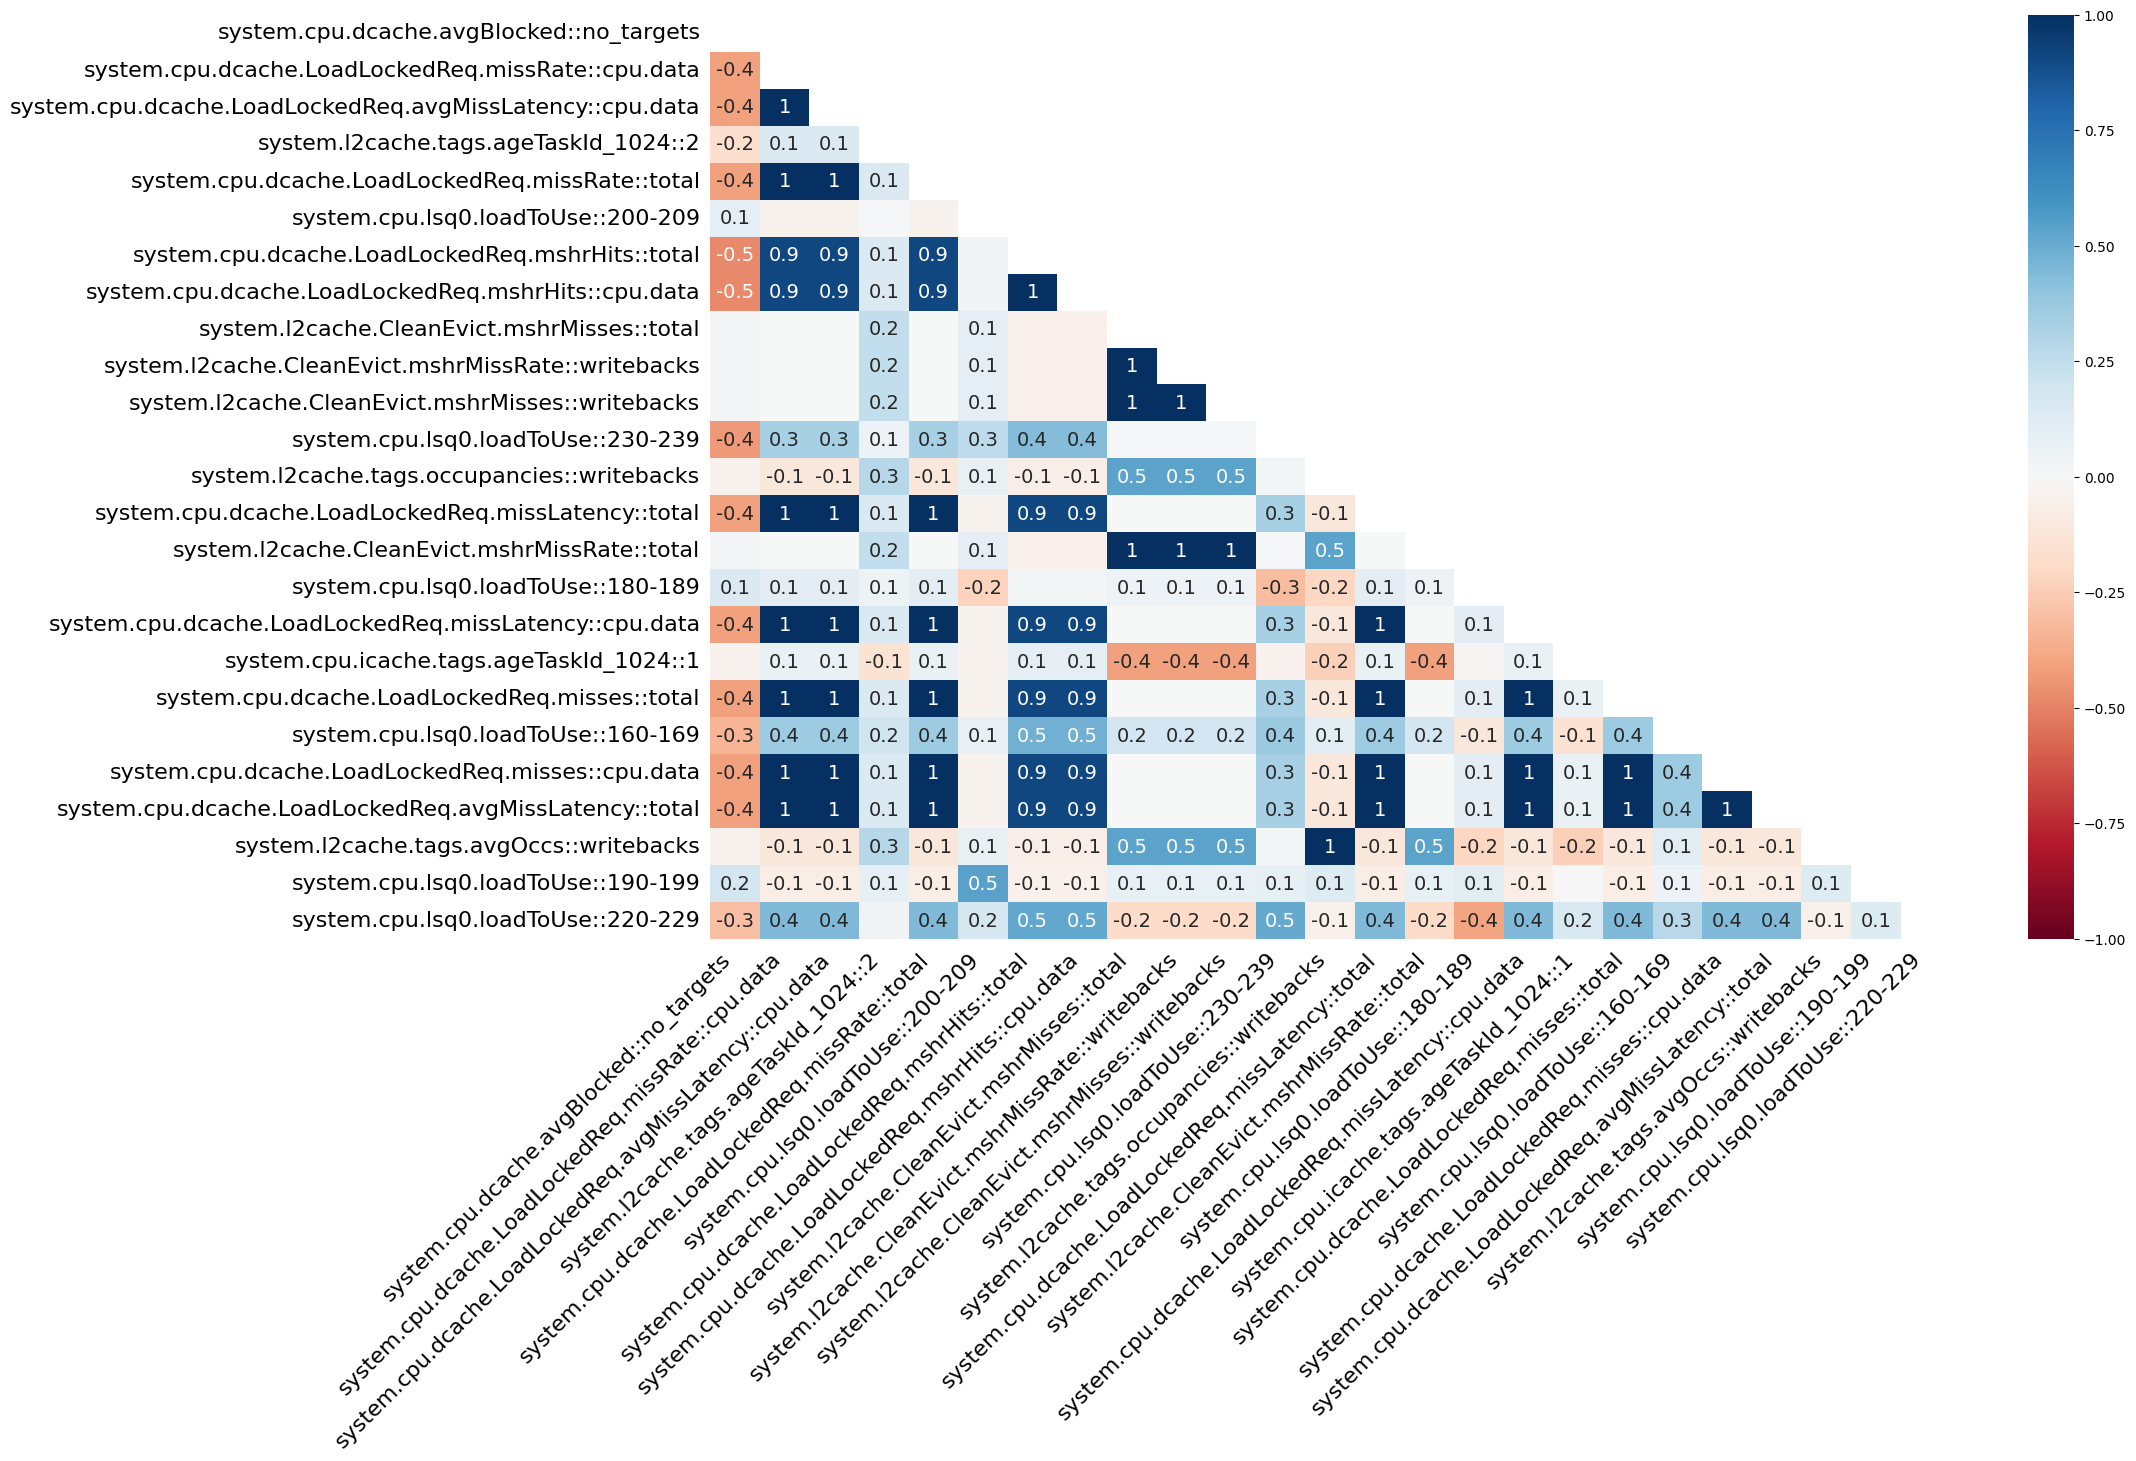

In [236]:
msno.heatmap(df_cleaned[columns_with_missing_values])

**Colonnes entre 0 et 30% de NA:**

In [253]:
df_cleaned_leq30 = df_cleaned[columns_with_missing_values].loc[:, df_cleaned.isna().mean() * 100 <=30]

In [261]:
columns_to_impute = df_cleaned_leq30.columns

In [262]:
columns_to_impute

Index(['system.l2cache.CleanEvict.mshrMisses::total',
       'system.l2cache.CleanEvict.mshrMissRate::writebacks',
       'system.l2cache.CleanEvict.mshrMisses::writebacks',
       'system.l2cache.CleanEvict.mshrMissRate::total'],
      dtype='object')

In [254]:
df_cleaned_leq30.isna().sum()

system.l2cache.CleanEvict.mshrMisses::total           6143
system.l2cache.CleanEvict.mshrMissRate::writebacks    6143
system.l2cache.CleanEvict.mshrMisses::writebacks      6143
system.l2cache.CleanEvict.mshrMissRate::total         6143
dtype: int64

In [263]:
df_cleaned[columns_to_impute] = imputer.fit_transform(df_cleaned[columns_to_impute])

**Colonnes entre 30 et 50% de NA:**

Ces colonnes gardent une forte valeur informative, mais imputer naïvement (mean/median) peut biaiser.

👉 Stratégies recommandées :

Option A – Imputation "statistique + flag"

Impute avec median

Ajoute une colonne xxx_missing_flag

🔍 Ça permet à ton modèle d’apprendre la distribution des NA (souvent informative en perf CPU).

In [267]:
na_pct = df_cleaned.isna().mean() * 100
cols_30_50 = na_pct[(na_pct > 30) & (na_pct <= 50)].index.tolist()

In [268]:
for col in cols_30_50:
    # 1. créer un flag (avant imputation)
    df_cleaned[f"{col}_missing_flag"] = df_cleaned[col].isna().astype(int)
    
    # 2. imputation par médiane
    median_value = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_value)


C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\1376997540.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned[f"{col}_missing_flag"] = df_cleaned[col].isna().astype(int)
C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\1376997540.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned[f"{col}_missing_flag"] = df_cleaned[col].isna().astype(int)
C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\1376997540.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

**Colonnes avec > 50% de NA:**

Ici il faut évaluer s’il y a un signal informatif ou non.

Règle pratique :

Si >60% NA, supprimer si la variable n’est pas critique.

Sinon, garder + imputer + ajouter missing_flag.

Vu ton dataset (métriques CPU / cache / latence), ces colonnes peuvent être importantes :
➡️ Ne supprime pas automatiquement.

In [269]:
na_pct = df_cleaned.isna().mean() * 100
cols_over_60 = na_pct[na_pct > 60].index.tolist()
cols_over_60


['system.cpu.icache.tags.ageTaskId_1024::1',
 'system.cpu.lsq0.loadToUse::200-209']

In [270]:
correlations = df_cleaned[cols_over_60].corrwith(df_cleaned['attack'])
correlations

c:\Users\clemm\miniconda3\envs\apprauto-env\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\clemm\miniconda3\envs\apprauto-env\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


system.cpu.icache.tags.ageTaskId_1024::1   NaN
system.cpu.lsq0.loadToUse::200-209         NaN
dtype: float64

In [ ]:
for col in cols_over_60:
    # 1. créer un flag (avant imputation)
    df_cleaned[f"{col}_missing_flag"] = df_cleaned[col].isna().astype(int)
    
    # 2. imputation par médiane
    median_value = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_value)


C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\3391664244.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned[f"{col}_missing_flag"] = df_cleaned[col].isna().astype(int)
C:\Users\clemm\AppData\Local\Temp\ipykernel_18320\3391664244.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned[f"{col}_missing_flag"] = df_cleaned[col].isna().astype(int)


In [275]:
df_cleaned.to_csv("../data/dataset_cleaned.csv")